In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import viz # curriculum viz example code

np.random.seed(123)


## Definitions:

probablility distribution includes:

- probability of every outcome in the sample space

- sample space: set of all outcomes. 6 for a normal dice

- sum of all probabilites in the sample space is always 1

### types of variables:

- discrete: number of calls, number of cats and dogs

- continuous: temperature, height

## Main types of distribution:

## uniform
    rolling a fair six sided die

### scipy objects
- value -> probability  
   -- pmf: probability at a particular value of random variable (only for discrete distributions!)  
    -- pdf: probability at a particular value of random variable (for continuous distributions)  
   -- cdf: cumulative probablity for less than or equal to value of random variable   
   -- sf:  probability for a random variable **greater than** certain value
- probability -> value  
   -- ppf: less than or equal to a point 
   -- isf: greater than a point  
- rvs for random values 

In [3]:
die_distribution = stats.randint(1,7)
die_distribution

In [4]:
die_distribution.rvs(10) #random values

array([6, 3, 5, 3, 2, 4, 3, 4, 2, 2])

In [5]:
# What is the probability of rolling a 3?
die_distribution.pmf(3) #property mass function, liklihood at certain point

0.16666666666666666

In [8]:
# P(3 or less)
die_distribution.cdf(3) #cumulative property


0.5

In [9]:
#Inverse (we have the output, need input)
die_distribution.ppf(0.5)

3.0

In [10]:
#P(>4) >> use a survival function
die_distribution.sf(4) #survival function, 5 or 6 probability to roll


0.33333333333333337

In [11]:
#P(1/3 a dice roll will be higher than what value?)
die_distribution.isf(1/3) #inverse survival function

4.0

## normal distribution == continuous variables

- bell curve
- heights are normally distributed
- average flight times to the same location
- mean (mu) and standard deviation (sigma) are needed

#### Suppose that a store's daily sales are normally distributed with a mean of 12,000 dollars and standard deviation of 2000 dollars.
 - What is the probability that sales are 10,000 dollars on a certain day.     
 - What is the probability that sales are 10,000 dollars <ins>or less</ins> on a certain day.
 - What is the probability that sales are greater than 15,000 dollars on a certain day.
 - How much would the daily sales have to be to be in the top 10% of all days?
 ####  What is the probability that sales are 10,000 dollars on a certain day?
#### What is the probability that sales are 10,000 dollars or less on a certain day.
#### What is the probability that sales are greater than 15,000 dollars on a certain day?
#### How much would the daily sales have to be to be in the top 10% of all days?

In [12]:
# stats.norm(mean, std_dev)

In [13]:
# random variable = sales
# parameters:
mean = 12_000
std_dev = 2000
#generate a dist:
sales = stats.norm(mean, std_dev)

In [14]:
sales.pdf(10000) #probability at a certain variable = pdf

0.00012098536225957169

In [15]:
sales.cdf(10000) #probability variable or less than certain variable = cdf

0.15865525393145707

In [16]:
sales.sf(15000) #probability variable or higher = sf
# or 1-cdf of 15000

0.06680720126885807

In [17]:
sales.isf(.10) # sales value from probability value = isf

14563.103131089201

#### Mini Exercise:

The average battery life for a fully charges iphone-12 is 14 hours with standard deviation of 1.5 hour


1. What kind of probability distribution represents the random variable "battery life in hours"?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution


4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:  


     a. What is the probability the cell phone battery more than 16 hours.  
     b. What is probability that cell phone battery lasts for exactly 12 hours.  
     c. What is the probability that cell phone battery lasts for 12 hours or less.  
     d. How many hours do the battery lasts for top 25% longest lasting phones.  

In [19]:
mean = 14
std_dev = 1.5

battery_life = stats.norm(mean, std_dev)
battery_life

In [20]:
battery_life.sf(16) # p(battery > 16) = sf

0.09121121972586788

In [21]:
battery_life.pdf(12) #

0.10934004978399577

In [26]:
battery_life.cdf(12)

0.09121121972586788

In [27]:
battery_life.isf(0.25)

15.011734625294123

## binomial distribution == discrete variables

 - discrete probability distribution
 - defined by number of trials >> these are the upper bound of values
 - probability of success in each trial
         - each trial independent probability
         - prob across trials is equal
         - each trial is independent
         - random variable (x) is success in each trial


In [28]:
# making a binomial dist
# x axis is number of successful trials e.g. the number of heads



#### Example: Suppose we flip a fair coin 5 times in a row. What is probability of getting exactly 1 head.

Random variable X = Number of heads (success) from flipping a coin 5 times


 What is a trial?

Define what is 'success'.

Total possible outcomes for 5 coin flips = 2.2.2.2.2 = 32

In [29]:
# p(0 heads in 5 trials)
n_trials = 5
p = 0.5 # (prob of success)

flips = stats.binom(n_trials, p)
flips

In [31]:
flips.pmf(0) #pmf for discrete variables

0.03125

In [32]:
flips.pmf(2) #pmf for discrete variables

0.31249999999999983

In [33]:
flips.pmf(1) #pmf for discrete variables

0.15624999999999997

#### Rigged coin distribution
- Probability of success (getting 'heads' in a coin toss) = 0.7  
- number of trials = 5

In [34]:
n_trials = 5
p = 0.7
flips = stats.binom(n_trials, p)
flips

In [35]:
flips.pmf(5)

0.16806999999999994

#### Example Binomial distribution:  
You are taking a multiple choice test consisting of 30 questions that you forgot to study for. Each question has 4 possible answers and you will choose one at random. What is the probability you get 11 or more questions right?

In [36]:
n_questions = 30
p = 0.25

correct_answers = stats.binom(n_questions, p)
correct_answers

In [37]:
correct_answers.sf(10) #sf is exclusive, we want odds of 11 and higher

0.05065828005155163

In [38]:
correct_answers.sf(5)

0.7974019257778622

#### Mini Exercise

The probability that a visitor will make a purchase when browsing in your web-store is 1.5%. You expect 350 web-visitors today 


1. What kind of probability distribution you have for "# number of visitors who end up making a purchase"?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution



4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:  


     a. What is the probability that exactly 10 vistors will make the a purchase?
     b. What is probability 13 or more visitors will make a purchase?  
     c. What is probability that 10 or less visitors will make a purchase?
     d. Visualize the resulting distribution (hint: try a bar chart)

In [39]:
visitors = 350
p = 0.015

purchase_agg = stats.binom(visitors, p)
purchase_agg

In [40]:
# p(10 purchases)
purchase_agg.pmf(10)

0.02258386964827325

In [41]:
# 13 or greater
purchase_agg.sf(12) 

0.0028028606293498577

In [42]:
# less than 10
purchase_agg.cdf(10)
# apply to python installs problem

0.9819938585504351

<BarContainer object of 15 artists>

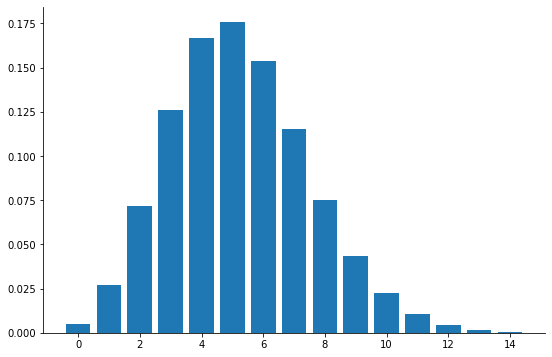

In [44]:
# plot data
x = np.arange(0, 15)
y = purchase_agg.pmf(x)

plt.bar(x, y)

## Poisson distribution == discrete variables
- but...expresses the probability of a number of events occuring in an interval of time
- no upper bound (x axis)
- only one parameter(lambda: occurence rate of target variable)
- independent probabilities
- probability of occurence does not change during period being measured

#### Real life examples:

Telecommunications: # of calls arriving in to customer service.  

Astronomy: photons arriving at a telescope.

Biology: the number of mutations on a strand of DNA per unit length.  

Management: customers arriving at a counter or call centre.

Finance and insurance: number of losses or claims occurring in a given period of time.  

Radioactivity: number of decays in a given time interval in a radioactive sample.


#### Example
Suppose that astronomers estimate that large meteorites (above a certain size) hit the earth on average once every 100 years (λ = 1 event per 100 years), and that the number of meteorite hits follows a Poisson distribution.

What is the probability of k = 0 meteorite hits in the next 100 years?

In [46]:
strikes = 1 #number of strikes per 100 years

stats.poisson(strikes).pmf(0)

0.36787944117144233

Text(0, 0.5, 'P(Strike)')

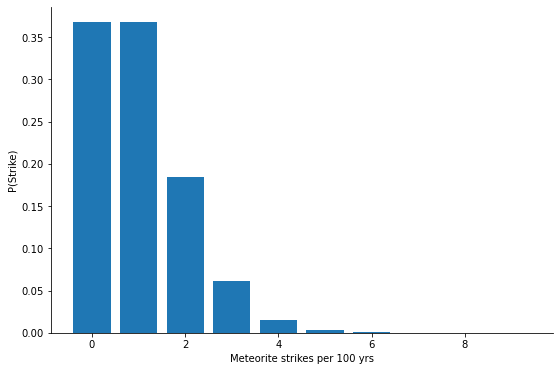

In [47]:
x = np.arange(0, 10)
y = stats.poisson(strikes).pmf(x) #probability at value

plt.bar(x, y)
plt.xlabel('Meteorite strikes per 100 yrs')
plt.ylabel('P(Strike)')

#### Mini Exercise:

Average number of customers going through CVS drive-through is 8 per hour. 

1. What kind of distribution we are working with?


2. What are the appropriate defining parameters for this distribution?


3. Create a Scipy object/instance for this distribution



4. Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the probability that 11 cars customers will go through in next hr.

In [52]:
customers = 8 #customers per hour
stats.poisson(customers)

In [54]:
stats.poisson(customers).pmf(11)
#syntax: module.operation(frequency of occurence).pmf(target level occurence)

0.07219020642293475